# Decision Tree

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

## Algorithm
The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.

### Entropy		
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

### Information Gain
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

## Building a Decision tree
To build a decision tree, we need to calculate two types of entropy using frequency tables as follows:	

Step 1: Calculate Entropy using the frequency table of target attribute:

$$
\Large E(S) = \sum_{i=1}^{c} -p_i log_2 p_i
$$

Step 2: Calculate Entroy of attributes with respect to target attribute:

$$
\Large E(T, X) = \sum_{c \in X} P(c)E(c)
$$
*_$P(c)$ probability of c_

Step 3: Calculate information gain of attributes and select the highest node as root node:

$$
\Large Gain(T, X) = E(T) - E(T, X)
$$

Step 4: Generate sub-tables for attributes with respect to parent node and target node.

Step 5: Repeat untill Entropy reaches 0.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./data/weather.csv")
map_dict = {"Sunny":0, "Overcast":1, "Rain":3, "Hot":0, "Mild":1, "Cool":2, "High":0, "Normal":1, "Weak":0, "Strong":1, "Yes":1, "No":0}
dataset.head()

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
X_raw = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [4]:
X = pd.DataFrame()
for x in X_raw:
    X[x] = X_raw[x].map(map_dict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42) 
X

,Outlook,Temp,Humidity,Wind
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,3,1,0,0
4,3,2,1,0
5,3,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,3,1,1,0


In [5]:
model = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


[Text(348.75, 396.375, 'Wind <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(209.25, 283.125, 'Outlook <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(139.5, 169.875, 'Temp <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(69.75, 56.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(209.25, 56.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 169.875, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(488.25, 283.125, 'Humidity <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(418.5, 169.875, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 169.875, 'Outlook <= 2.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(488.25, 56.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(627.75, 56.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

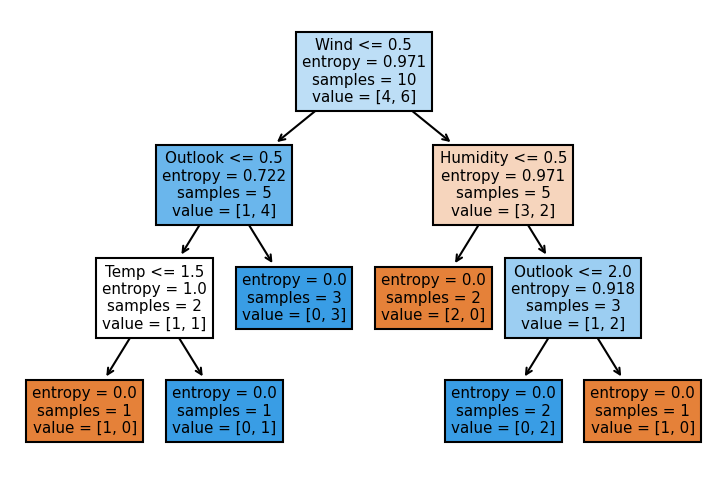

In [7]:
plt.figure(dpi=150)
plot_tree(model, feature_names=X_raw.columns, filled=True)

In [8]:
def make_prediction(case):
    df = pd.DataFrame(case)[0].map(map_dict)
    return model.predict([df])

In [9]:
print(make_prediction(["Overcast","Hot","High","Strong"]))

['No']


In [10]:
print(make_prediction(["Overcast","Hot","Normal","Weak"]))

['Yes']
